In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression


ModuleNotFoundError: No module named 'pandas'

In [435]:
df = pd.read_csv('train.csv')
df_submission = pd.read_csv('sample_submission.csv')
df_test = pd.read_csv('test.csv') 

In [436]:
print(df_test.shape)
print(df_submission.shape)

(1459, 80)
(1459, 2)


In [437]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [439]:
missing_values = df.isnull().sum()
dic = {}
for column, missing_count in missing_values.items():
    if missing_count >= 1:
        missing_p =(missing_count/1459)*100
        dic[column] = missing_p 
        print(f'{column}: {missing_p}')


LotFrontage: 17.751884852638796
Alley: 93.83139136394792
MasVnrType: 59.76696367374914
MasVnrArea: 0.5483207676490748
BsmtQual: 2.5359835503769705
BsmtCond: 2.5359835503769705
BsmtExposure: 2.604523646333105
BsmtFinType1: 2.5359835503769705
BsmtFinType2: 2.604523646333105
Electrical: 0.06854009595613435
FireplaceQu: 47.292666209732694
GarageType: 5.551747772446881
GarageYrBlt: 5.551747772446881
GarageFinish: 5.551747772446881
GarageQual: 5.551747772446881
GarageCond: 5.551747772446881
PoolQC: 99.5887594242632
Fence: 80.80877313228238
MiscFeature: 96.36737491432487


In [440]:
df_missing = pd.DataFrame(list(dic.items()), columns=['Column', 'Missing Percentage'])

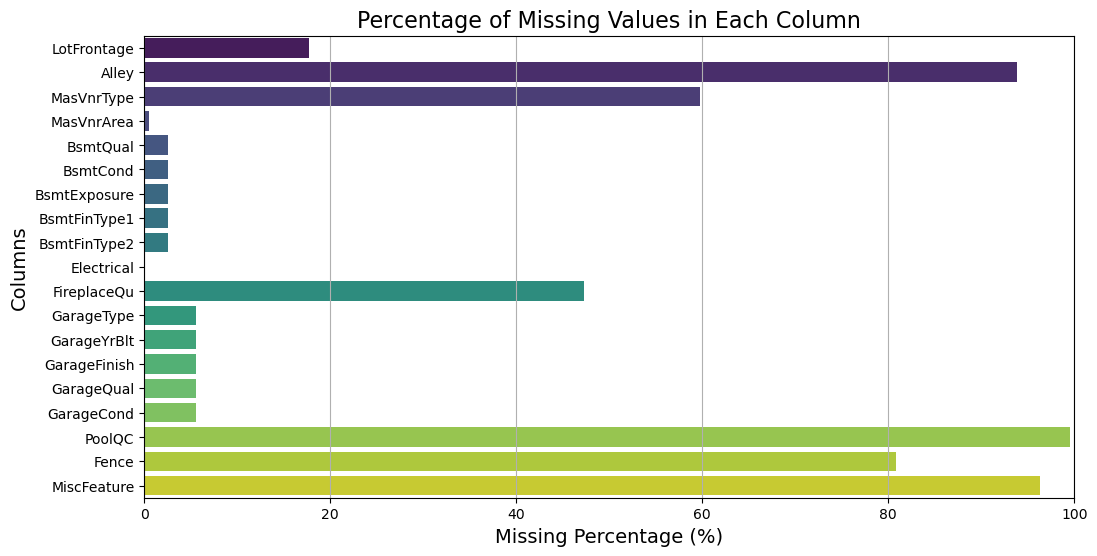

In [441]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Missing Percentage', y='Column', data=df_missing, palette='viridis')

plt.title('Percentage of Missing Values in Each Column', fontsize=16)
plt.xlabel('Missing Percentage (%)', fontsize=14)
plt.ylabel('Columns', fontsize=14)
plt.xlim(0, 100)  
plt.grid(axis='x') 

plt.show()

In [442]:
df.corr(numeric_only=True)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [443]:
relavent_numeric_features = df[["OverallQual","LotFrontage","LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1",
                            "BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF",  "GrLivArea","BsmtFullBath","FullBath","HalfBath","TotRmsAbvGrd",
                            "Fireplaces","GarageYrBlt","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF"]]


In [444]:
relavent_numeric_features.head()

,OverallQual,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,7,65.0,8450,2003,2003,196.0,706,150,856,856,...,1,2,1,8,0,2003.0,2,548,0,61
1,6,80.0,9600,1976,1976,0.0,978,284,1262,1262,...,0,2,0,6,1,1976.0,2,460,298,0
2,7,68.0,11250,2001,2002,162.0,486,434,920,920,...,1,2,1,6,1,2001.0,2,608,0,42
3,7,60.0,9550,1915,1970,0.0,216,540,756,961,...,1,1,0,7,1,1998.0,3,642,0,35
4,8,84.0,14260,2000,2000,350.0,655,490,1145,1145,...,1,2,1,9,1,2000.0,3,836,192,84


In [445]:
relavent_numeric_features.isnull().sum()

OverallQual       0
LotFrontage     259
LotArea           0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
FullBath          0
HalfBath          0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
dtype: int64

In [446]:
cat_cols = df.select_dtypes(include = ["object"])

In [447]:
cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

In [448]:
correlations = {}
for col in cat_cols:
    if df[col].isnull().sum() == 0:
        df_encoded = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df_encoded['SalePrice'] = df['SalePrice']
        corr = df_encoded.corr()['SalePrice'][:-1].abs().mean() 
        correlations[col] = corr

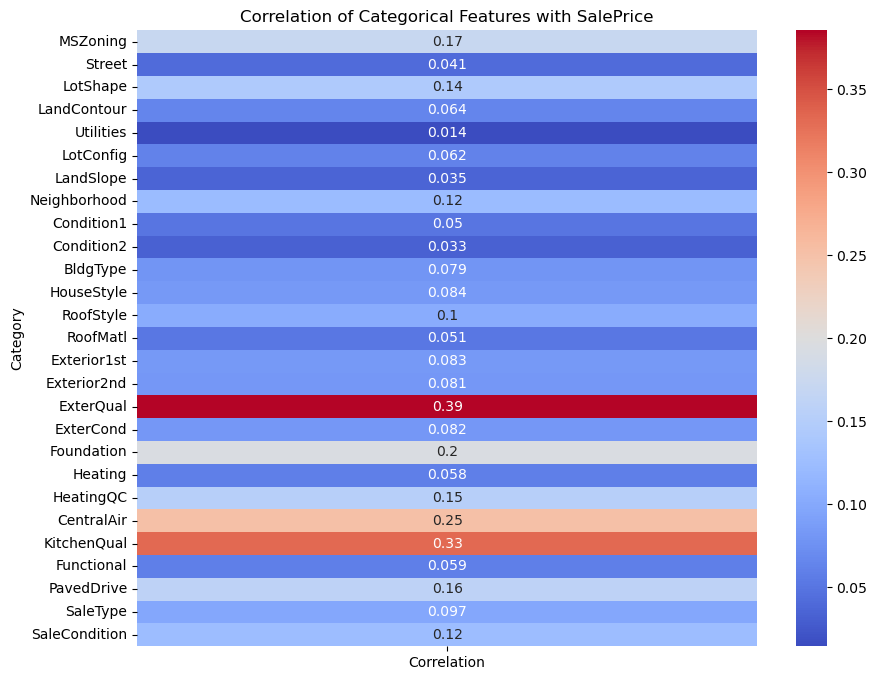

In [449]:
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Category', 'Correlation'])
correlation_df.set_index('Category', inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm')
plt.title("Correlation of Categorical Features with SalePrice")
plt.show()

In [450]:
relavent_cat_features = cat_cols[["ExterQual","Foundation","KitchenQual","CentralAir","Neighborhood"]]

# checking the unique values of the features
for i in relavent_cat_features:
    print(i)
    print(cat_cols[i].unique())
    print("---------------------------------------------------------------")
    print("\n")

ExterQual
['Gd' 'TA' 'Ex' 'Fa']
---------------------------------------------------------------


Foundation
['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
---------------------------------------------------------------


KitchenQual
['Gd' 'TA' 'Ex' 'Fa']
---------------------------------------------------------------


CentralAir
['Y' 'N']
---------------------------------------------------------------


Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
---------------------------------------------------------------




In [451]:
relavent_cat_features.isnull().sum()

ExterQual       0
Foundation      0
KitchenQual     0
CentralAir      0
Neighborhood    0
dtype: int64

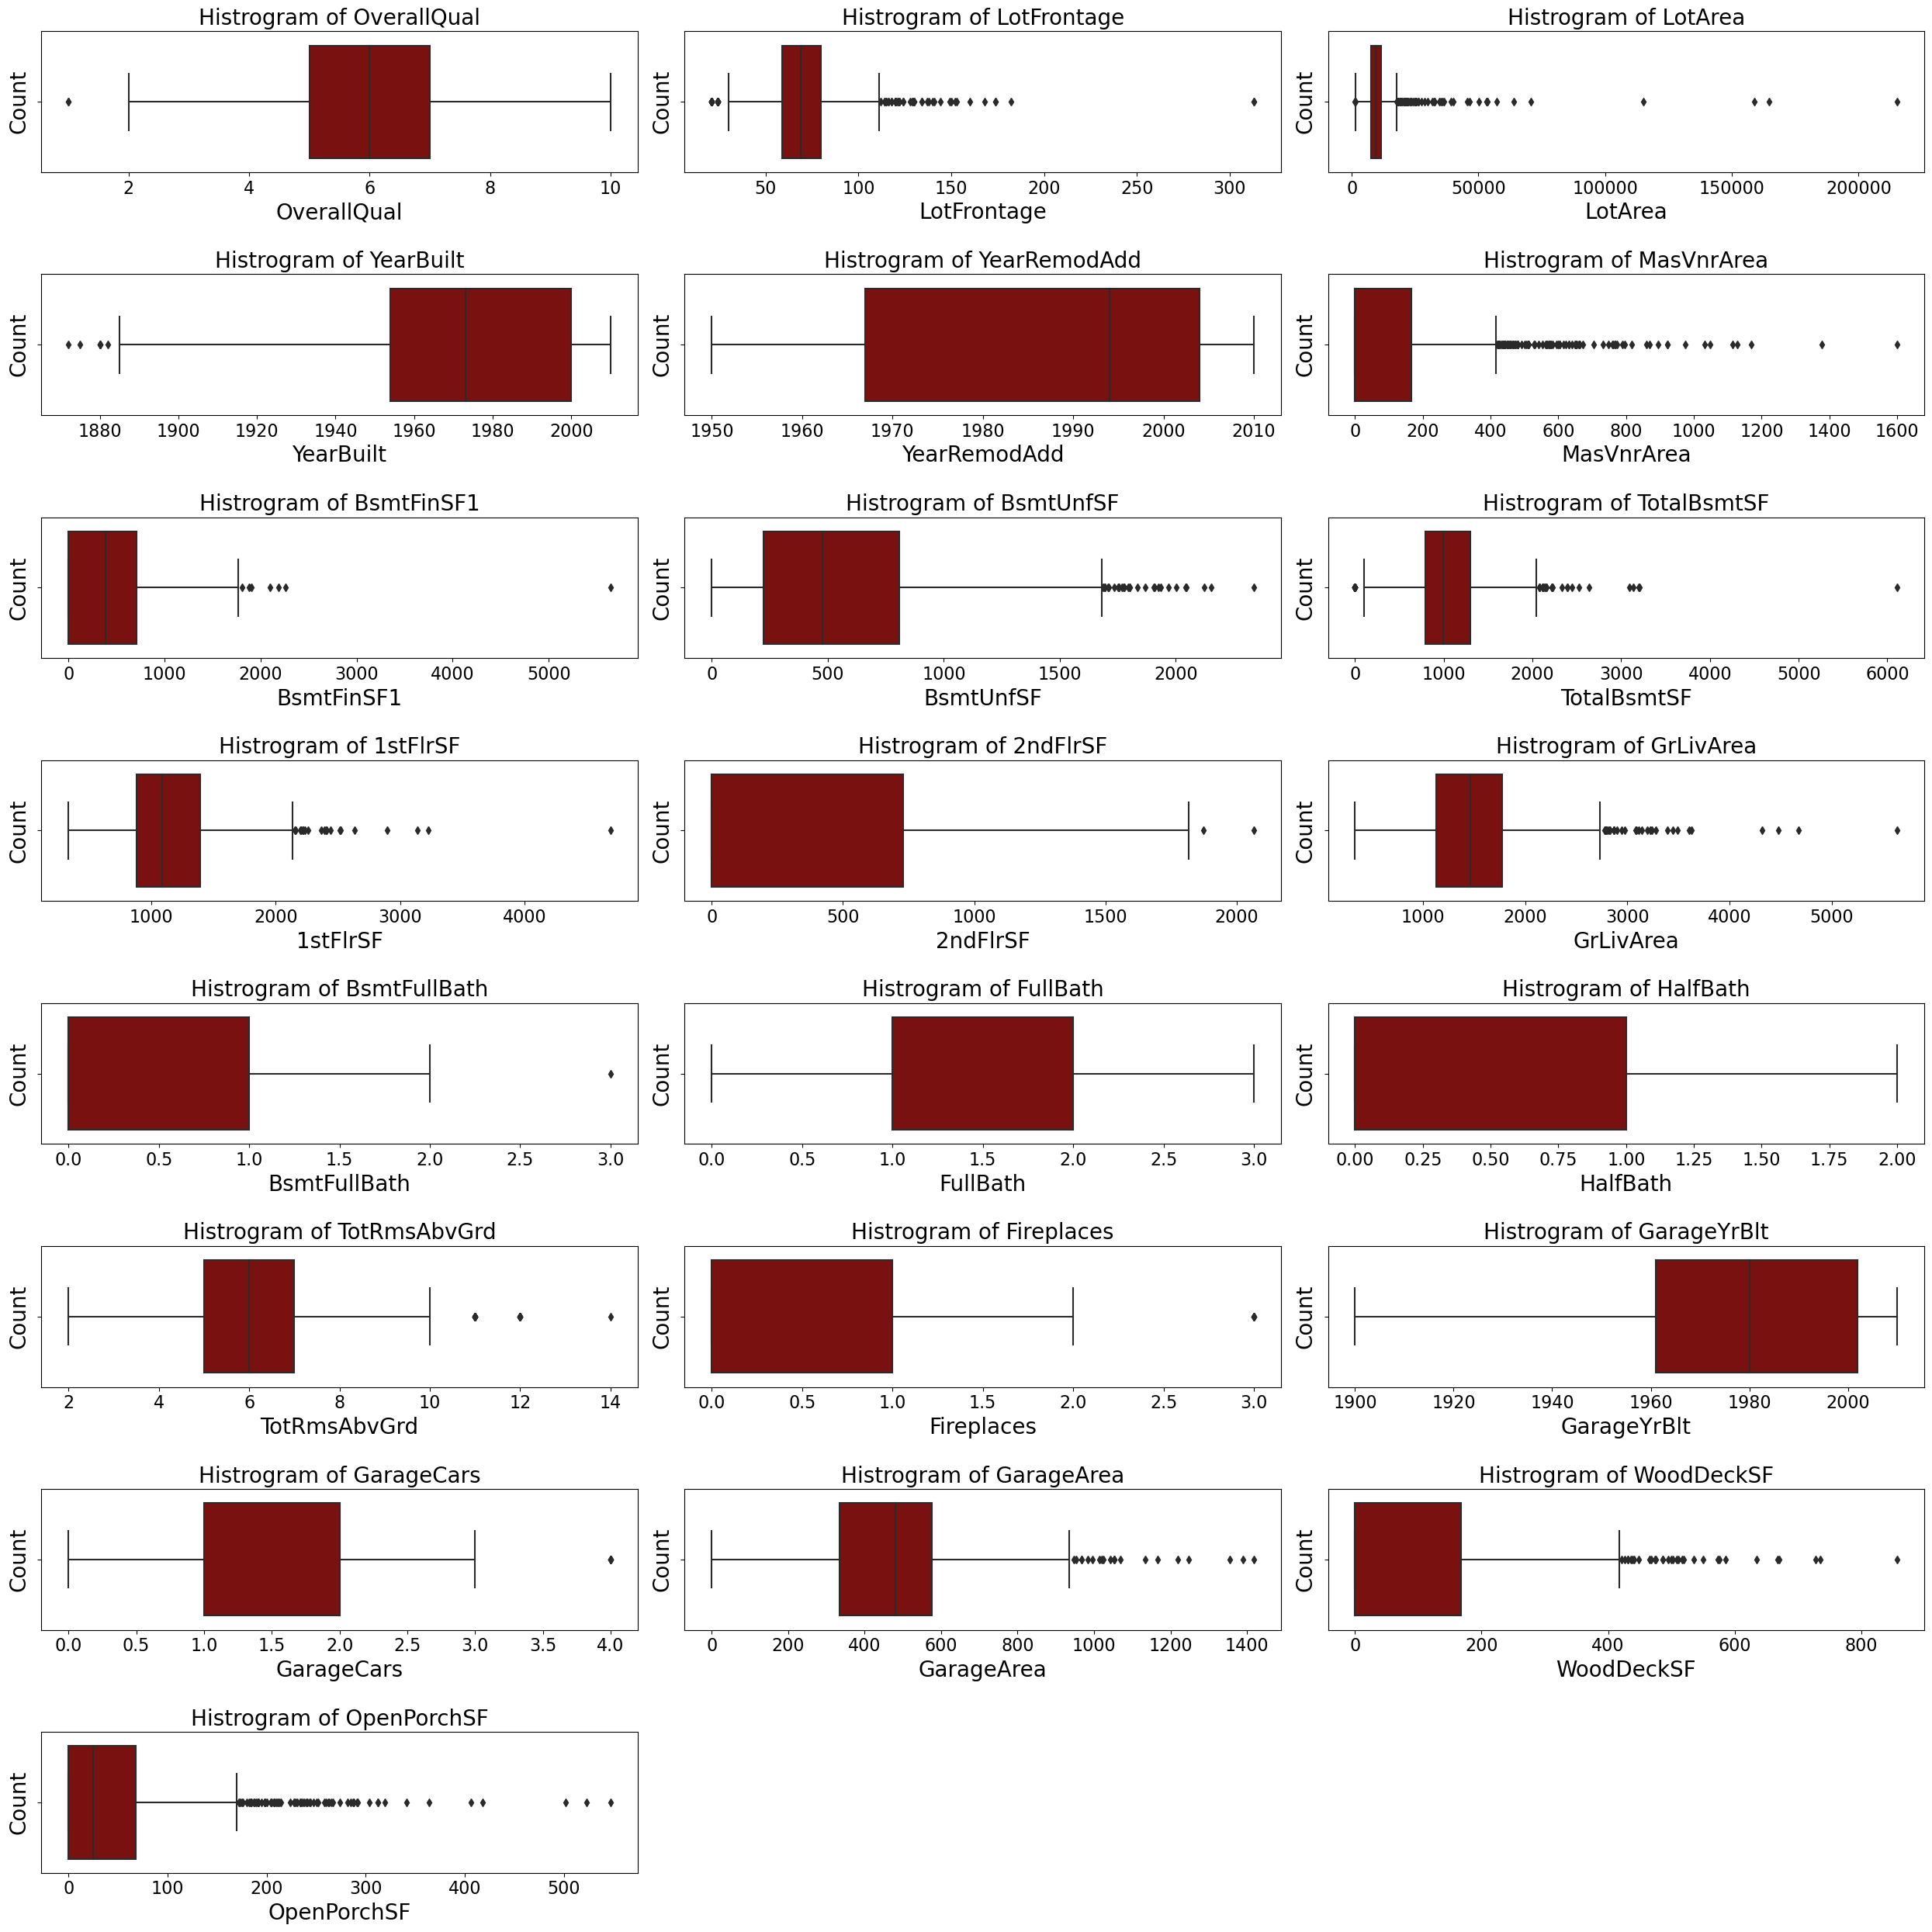

In [452]:
plt.figure(figsize = (25,25))
for i , cols in enumerate(relavent_numeric_features):
    plt.subplot(8,3,i+1)
    sns.boxplot(data = df, x = cols,color = "darkred")
    plt.xlabel(f"{cols}",fontsize = 20)
    plt.ylabel("Count",fontsize = 20)
    plt.title(f"Histrogram of {cols}",fontsize = 20)
    plt.tick_params(axis='x', labelsize=16)


plt.subplots_adjust(hspace=2)
plt.tight_layout(h_pad = 2.5)
plt.show()

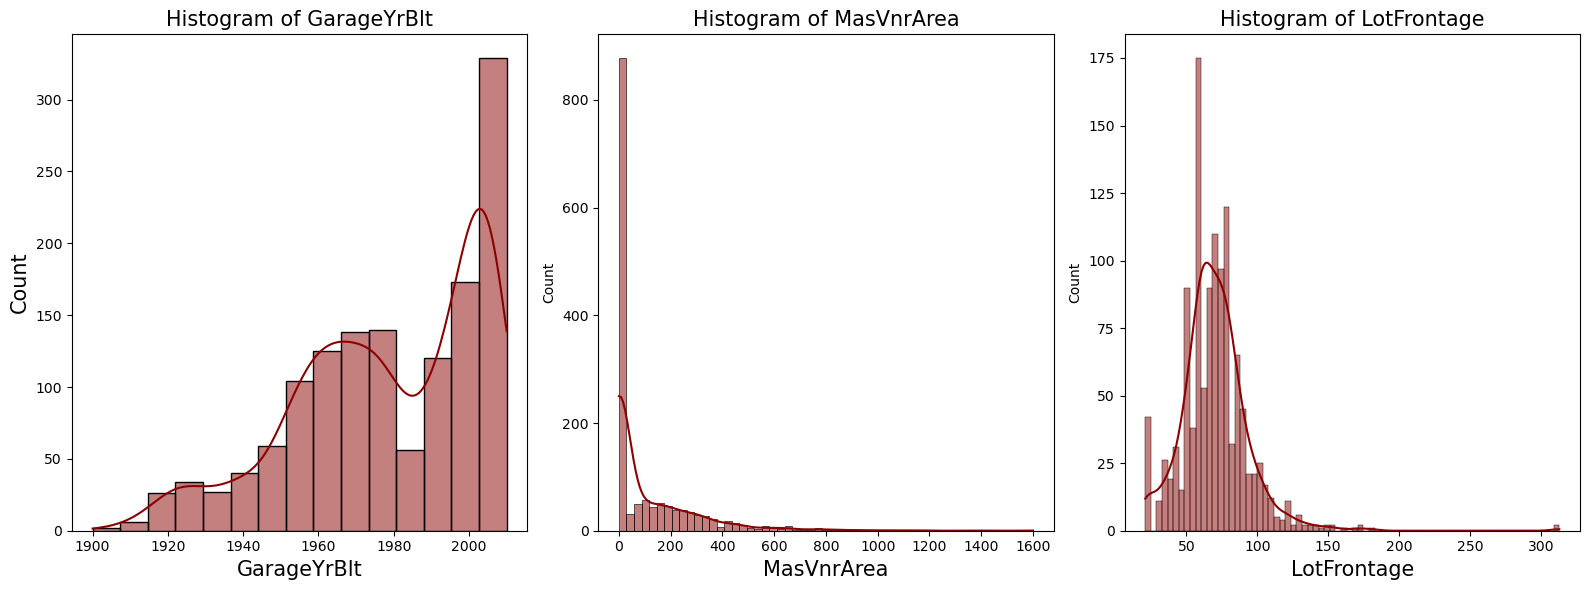

In [453]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1) 
sns.histplot(data=df, x="GarageYrBlt", kde=True, color="darkred")
plt.title("Histogram of GarageYrBlt",fontsize = 15)
plt.xlabel("GarageYrBlt",fontsize = 15)
plt.ylabel("Count",fontsize = 15)

plt.subplot(1, 3, 2)
sns.histplot(data=df, x="MasVnrArea", color="darkred", kde = True)
plt.title("Histogram of MasVnrArea",fontsize = 15)
plt.xlabel("MasVnrArea",fontsize = 15)

plt.subplot(1, 3, 3)
sns.histplot(data=df, x="LotFrontage", color="darkred", kde = True)
plt.title("Histogram of LotFrontage",fontsize = 15)
plt.xlabel("LotFrontage",fontsize = 15)

plt.tight_layout()  
plt.show()

In [454]:
relavent_numeric_features.isnull().sum()

OverallQual       0
LotFrontage     259
LotArea           0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
FullBath          0
HalfBath          0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
dtype: int64

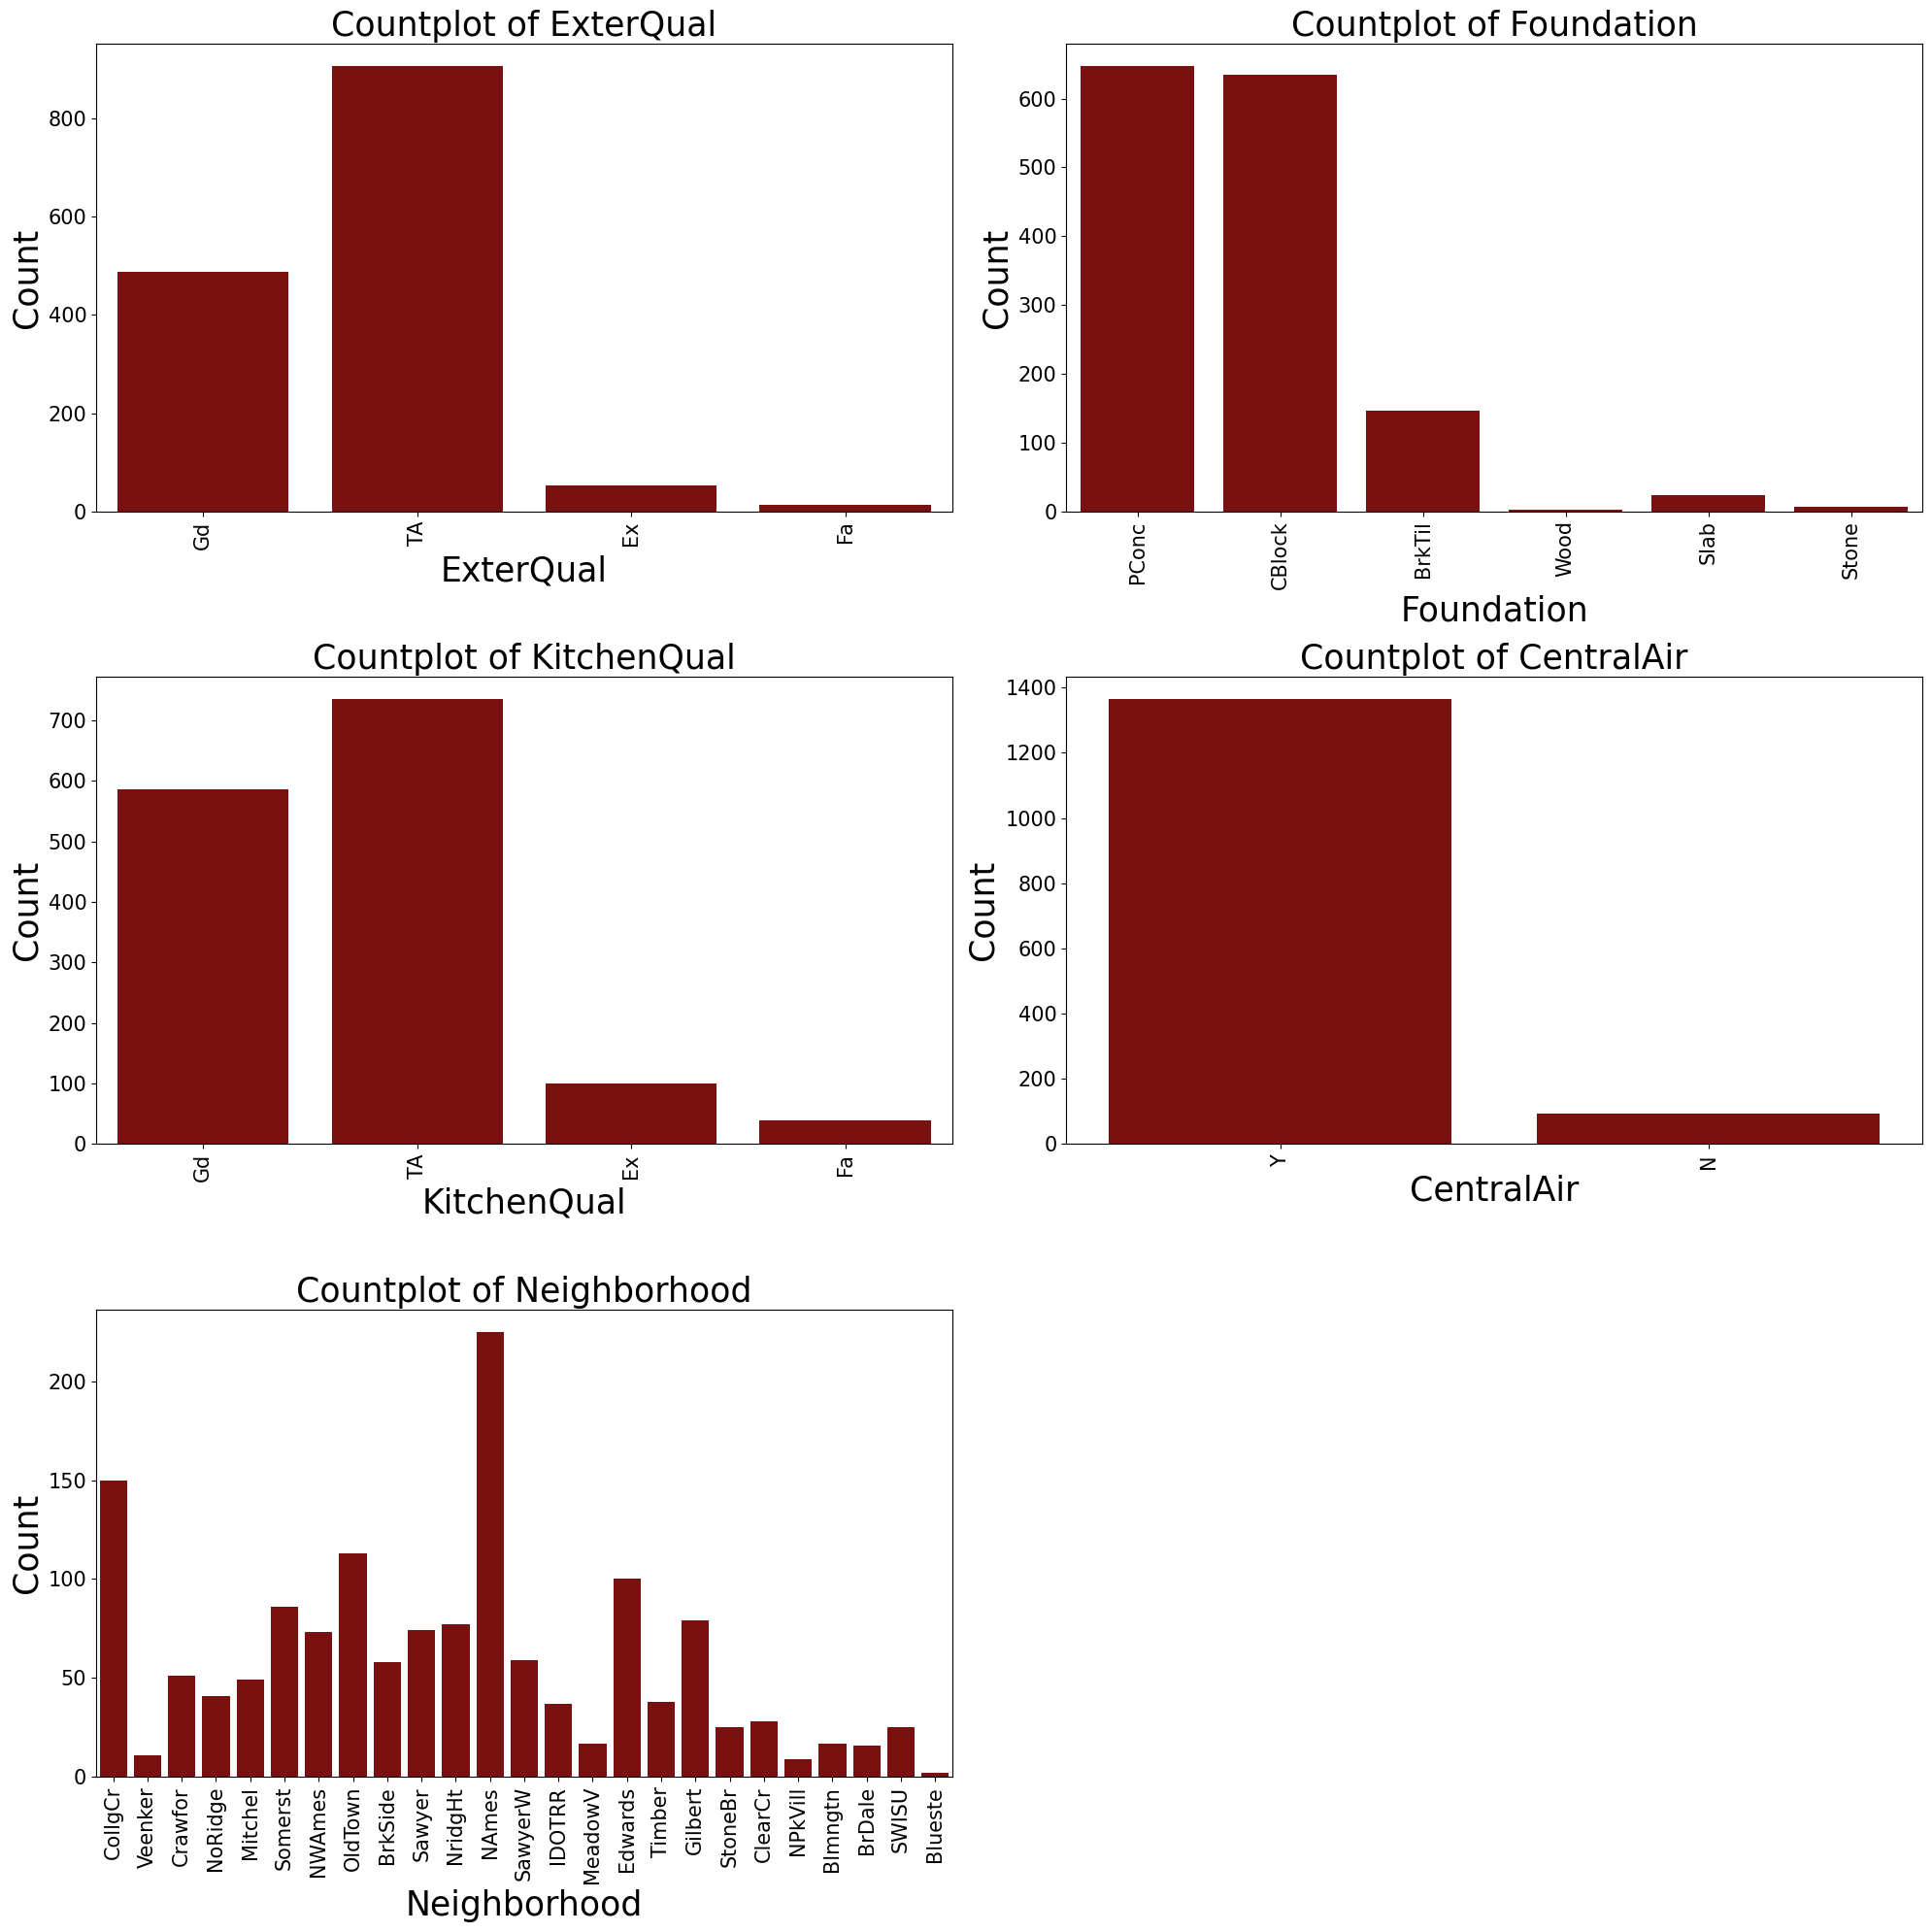

In [455]:
plt.figure(figsize = (20,20))

for i , cols in enumerate(relavent_cat_features):
    plt.subplot(3, 2, i+1)  
    sns.countplot(data = df, x = cols, color = "darkred")
    plt.title(f"Countplot of {cols}",fontsize = 25)
    plt.xlabel(f"{cols}",fontsize = 25)
    plt.ylabel("Count",fontsize = 25)
    plt.tick_params(axis='both', labelsize=15)
    plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

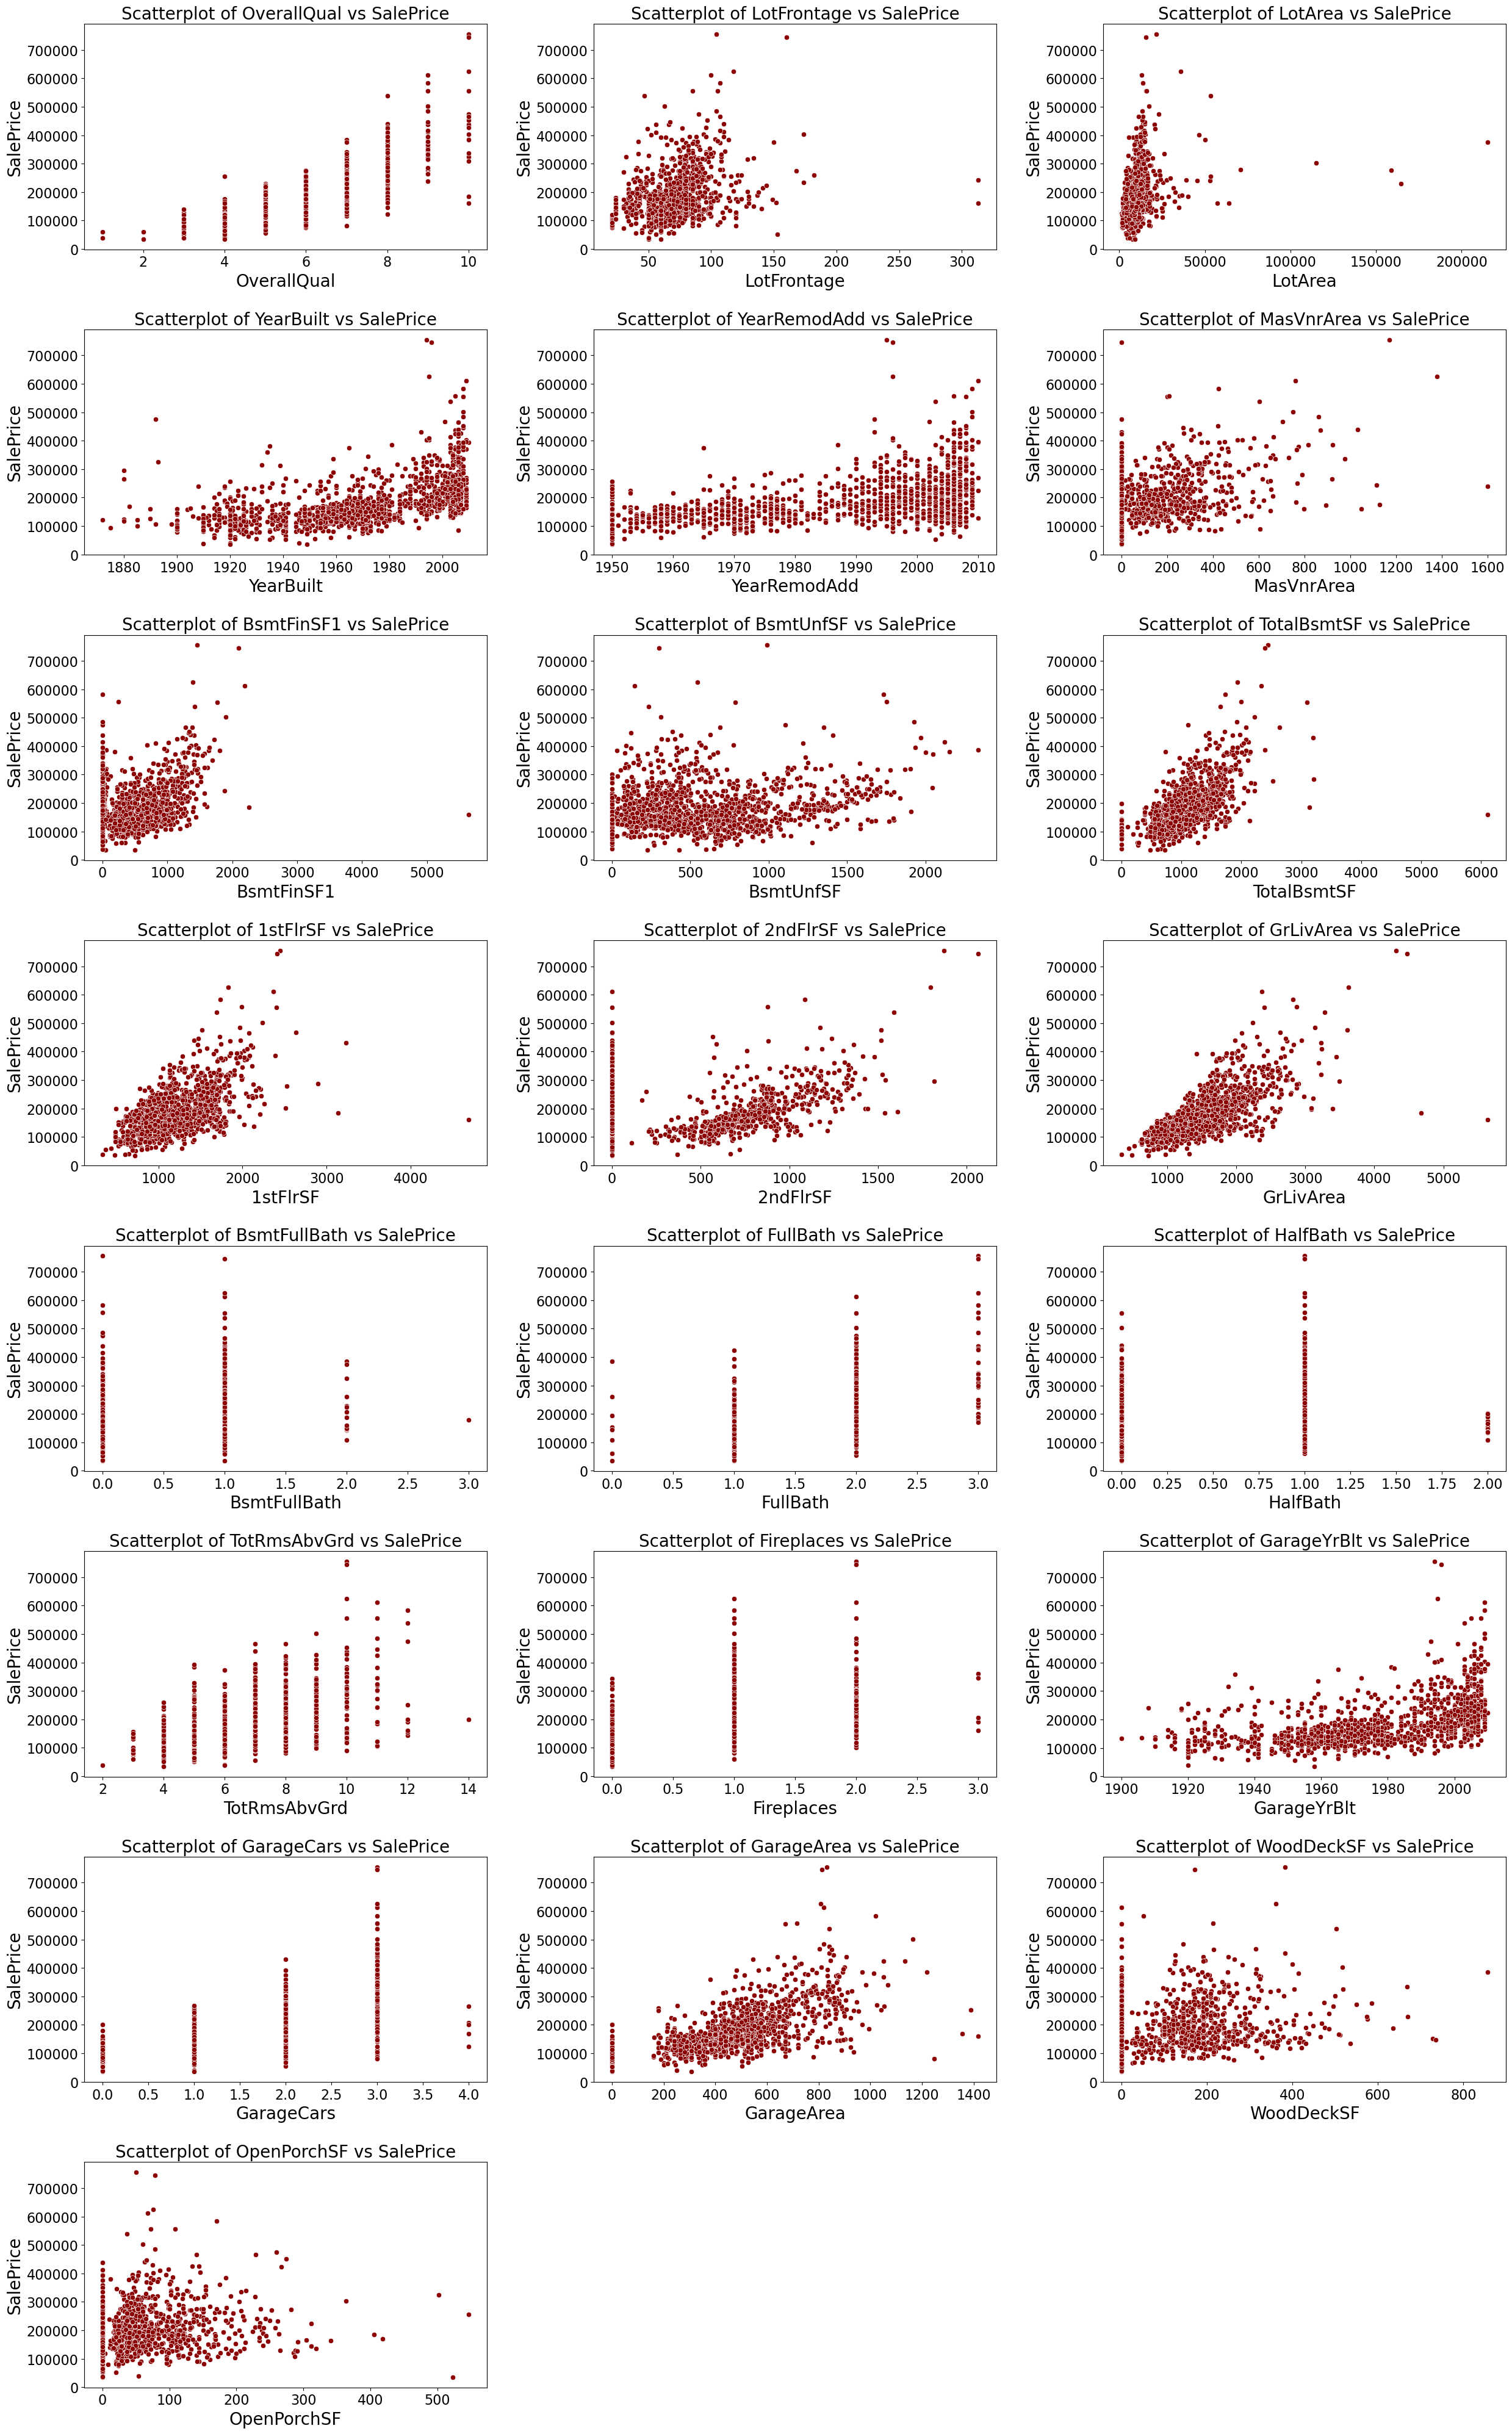

In [456]:
plt.figure(figsize = (25,40))
for i , cols in enumerate(relavent_numeric_features):
    plt.subplot(8,3,i+1)
    sns.scatterplot(data = df, x = cols,y="SalePrice",color = "darkred")
    plt.xlabel(f"{cols}",fontsize = 20)
    plt.ylabel("SalePrice",fontsize = 20)
    plt.title(f"Scatterplot of {cols} vs SalePrice",fontsize = 20)
    plt.tick_params(axis='both', labelsize=16)


plt.subplots_adjust(hspace=2,wspace = 2)
plt.tight_layout(h_pad = 2.5,w_pad = 2.5)
plt.show()

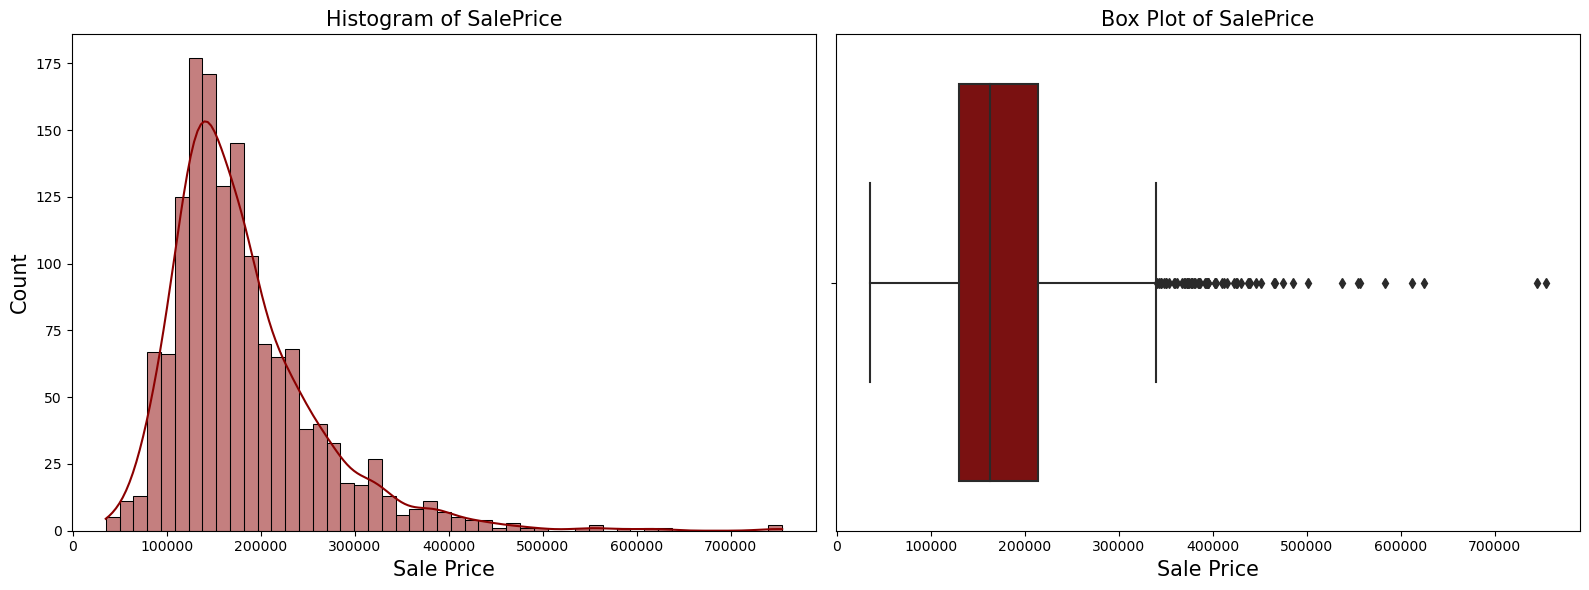

In [457]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1) 
sns.histplot(data=df, x="SalePrice", kde=True, color="darkred")
plt.title("Histogram of SalePrice",fontsize = 15)
plt.xlabel("Sale Price",fontsize = 15)
plt.ylabel("Count",fontsize = 15)


plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="SalePrice", color="darkred")
plt.title("Box Plot of SalePrice",fontsize = 15)
plt.xlabel("Sale Price",fontsize = 15)

plt.tight_layout()  
plt.show()

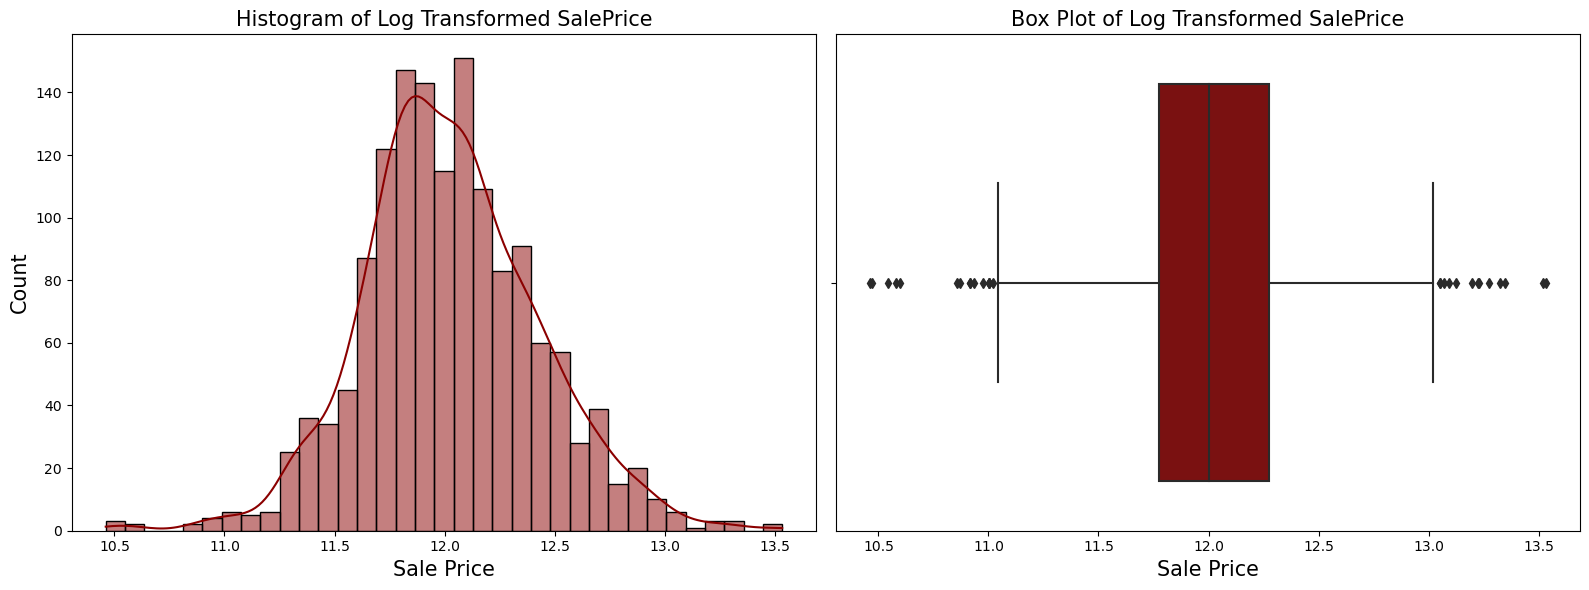

In [458]:
log_SalePrice = np.log(df["SalePrice"]+1)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1) 
sns.histplot( x=log_SalePrice, kde=True, color="darkred")
plt.title("Histogram of Log Transformed SalePrice",fontsize = 15)
plt.xlabel("Sale Price",fontsize = 15)
plt.ylabel("Count",fontsize = 15)


plt.subplot(1, 2, 2)
sns.boxplot( x=log_SalePrice, color="darkred")
plt.title("Box Plot of Log Transformed SalePrice",fontsize = 15)
plt.xlabel("Sale Price",fontsize = 15)

plt.tight_layout()  
plt.show()

In [459]:
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1 * IQR

df_filtered = df[(df['SalePrice'] >= lower_bound) & (df['SalePrice'] <= upper_bound)]

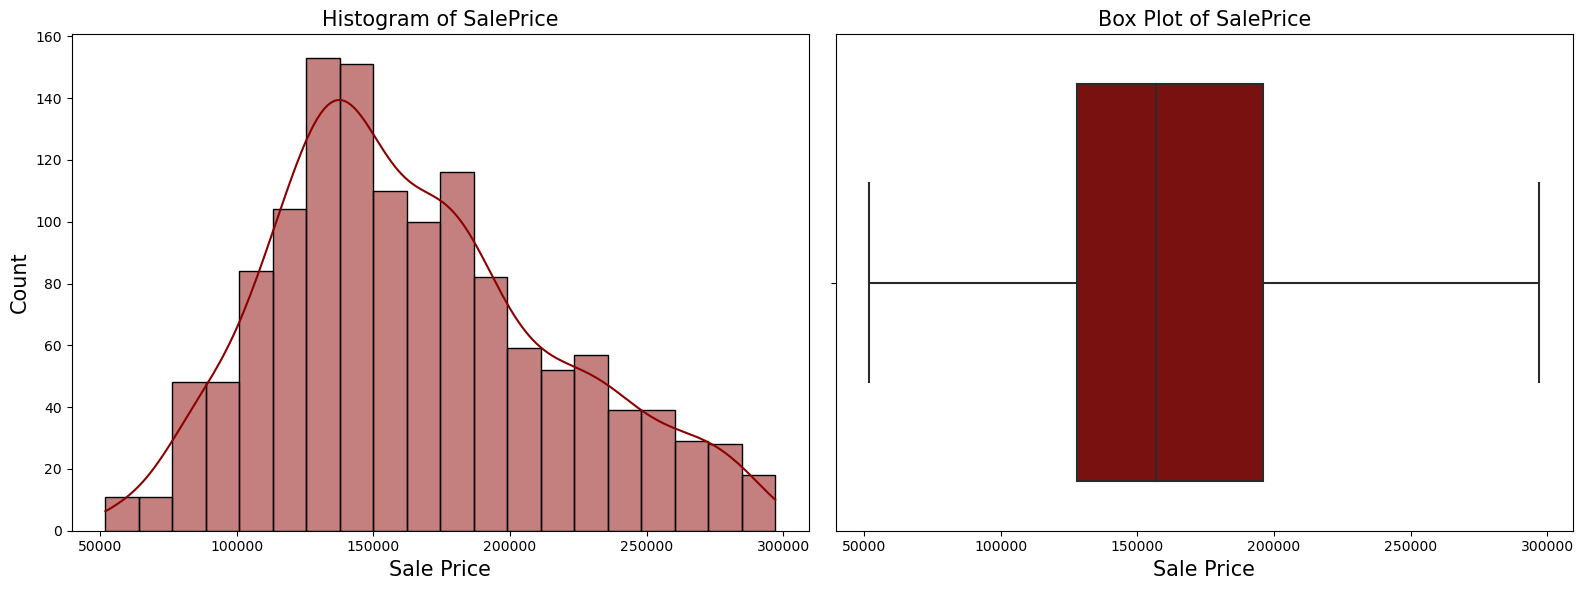

In [460]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1) 
sns.histplot(data=df_filtered, x="SalePrice", kde=True, color="darkred")
plt.title("Histogram of SalePrice",fontsize = 15)
plt.xlabel("Sale Price",fontsize = 15)
plt.ylabel("Count",fontsize = 15)


plt.subplot(1, 2, 2)
sns.boxplot(data=df_filtered, x="SalePrice", color="darkred")
plt.title("Box Plot of SalePrice",fontsize = 15)
plt.xlabel("Sale Price",fontsize = 15)

plt.tight_layout()  
plt.show()

In [461]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1339 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1339 non-null   int64  
 1   MSSubClass     1339 non-null   int64  
 2   MSZoning       1339 non-null   object 
 3   LotFrontage    1090 non-null   float64
 4   LotArea        1339 non-null   int64  
 5   Street         1339 non-null   object 
 6   Alley          90 non-null     object 
 7   LotShape       1339 non-null   object 
 8   LandContour    1339 non-null   object 
 9   Utilities      1339 non-null   object 
 10  LotConfig      1339 non-null   object 
 11  LandSlope      1339 non-null   object 
 12  Neighborhood   1339 non-null   object 
 13  Condition1     1339 non-null   object 
 14  Condition2     1339 non-null   object 
 15  BldgType       1339 non-null   object 
 16  HouseStyle     1339 non-null   object 
 17  OverallQual    1339 non-null   int64  
 18  OverallCond  

In [462]:
columns=['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature','Utilities','Street']
df_filtered = df_filtered.drop(columns,axis=1)
df_test=df_test.drop(columns,axis=1)

In [463]:
a=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond']
for i in a:
    df_filtered[i] = df_filtered[i].fillna(df_filtered[i].mode()[0])
    df_test[i]=df_test[i].fillna(df_test[i].mode()[0])

c=['MSZoning','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType']
for i in c:
    df_test[i]=df_test[i].fillna(df_test[i].mode()[0])

In [464]:
b=['LotFrontage','MasVnrArea','GarageYrBlt']
for i in b:
    df_filtered[i]=df_filtered[i].fillna(df_filtered[i].mean())
    df_test[i]=df_test[i].fillna(df_test[i].mean())

d=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea']
for i in d:
    df_test[i]=df_test[i].fillna(df_test[i].mean())

In [465]:
df_filtered['TotalSF']=df_filtered['TotalBsmtSF']+df_filtered['1stFlrSF']+df_filtered['2ndFlrSF']
df_test['TotalSF']=df_test['TotalBsmtSF']+df_test['1stFlrSF']+df_test['2ndFlrSF']
df_filtered['Age']=df_filtered['YrSold']-df_filtered['YearBuilt']
df_test['Age']=df_test['YrSold']-df_test['YearBuilt']
df_filtered['RemodelAge']=df_filtered['YearRemodAdd']!=df_filtered['YearBuilt'].astype(int)
df_test['RemodelAge']=df_test['YearRemodAdd']!=df_test['YearBuilt'].astype(int)

df_filtered=df_filtered.drop(['YearBuilt','YearRemodAdd','YrSold','TotalBsmtSF','1stFlrSF','2ndFlrSF'],axis=1)
df_test=df_test.drop(['YearBuilt','YearRemodAdd','YrSold','TotalBsmtSF','1stFlrSF','2ndFlrSF'],axis=1)
df_filtered['RemodelAge']=df_filtered['RemodelAge'].astype(int)
df_test['RemodelAge']=df_test['RemodelAge'].astype(int)

In [466]:
le = LabelEncoder()
for i in df_filtered.columns:
    if df_filtered[i].dtype=='object':
        df_filtered[i]=le.fit_transform(df_filtered[i])
for i in df_test.columns:
    if df_test[i].dtype=='object':
        df_test[i]=le.fit_transform(df_test[i])

In [467]:
df_filtered['SalePrice']=np.log1p(df_filtered['SalePrice'])

In [468]:
df_filtered = df_filtered.drop(columns='Id', axis = 1)

In [469]:
x=df_filtered.drop(['SalePrice'],axis=1)
y=df_filtered['SalePrice']

In [470]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int64  
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   LotShape       1459 non-null   int64  
 6   LandContour    1459 non-null   int64  
 7   LotConfig      1459 non-null   int64  
 8   LandSlope      1459 non-null   int64  
 9   Neighborhood   1459 non-null   int64  
 10  Condition1     1459 non-null   int64  
 11  Condition2     1459 non-null   int64  
 12  BldgType       1459 non-null   int64  
 13  HouseStyle     1459 non-null   int64  
 14  OverallQual    1459 non-null   int64  
 15  OverallCond    1459 non-null   int64  
 16  RoofStyle      1459 non-null   int64  
 17  RoofMatl       1459 non-null   int64  
 18  Exterior

In [471]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1339 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1339 non-null   int64  
 1   MSZoning       1339 non-null   int64  
 2   LotFrontage    1339 non-null   float64
 3   LotArea        1339 non-null   int64  
 4   LotShape       1339 non-null   int64  
 5   LandContour    1339 non-null   int64  
 6   LotConfig      1339 non-null   int64  
 7   LandSlope      1339 non-null   int64  
 8   Neighborhood   1339 non-null   int64  
 9   Condition1     1339 non-null   int64  
 10  Condition2     1339 non-null   int64  
 11  BldgType       1339 non-null   int64  
 12  HouseStyle     1339 non-null   int64  
 13  OverallQual    1339 non-null   int64  
 14  OverallCond    1339 non-null   int64  
 15  RoofStyle      1339 non-null   int64  
 16  RoofMatl       1339 non-null   int64  
 17  Exterior1st    1339 non-null   int64  
 18  Exterior2nd  

In [472]:
df_test = df_test.drop('Id', axis = 1)

In [473]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [474]:
lr = LinearRegression()
model = lr.fit(x_train,y_train)


In [475]:
model.score(x_test,y_test)

0.8261709053961425

In [476]:
print(df_test.shape)
print(df_submission.shape)


(1459, 68)
(1459, 2)


In [477]:
df_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [478]:
df_submission = df_submission.drop('Id', axis=1)
#df_submission = df_submission.iloc[:, 0]  


In [1]:
model.score(df_test, df_submission)
#burayi anlamadim 

NameError: name 'model' is not defined

In [480]:
x = x_train
y = y_train

scores = cross_val_score(lr, x, y, cv=4)
print(scores)


[0.82466289 0.80448284 0.81182785 0.66598268]


In [481]:
x = df_test
y = df_submission

scores = cross_val_score(lr, x, y, cv=4)
print(scores)


[0.97961023 0.99708889 0.99682556 0.98808866]
